In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("T1_10s.np.npy")
# plt.plot(data[:])
window = 100
x = np.linspace(0, 10, len(data))
x_env = x[::window]
top_env = np.amax(data.reshape(-1, window), -1)
bottom_env = np.amin(data.reshape(-1, window), -1)

0.09182708960000019


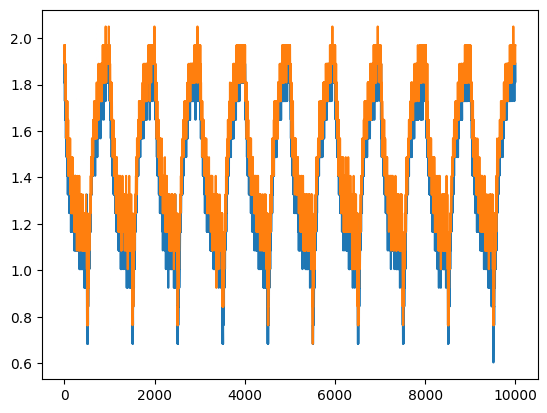

In [3]:
plt.plot(-1*bottom_env)
plt.plot(top_env)
dif = np.mean(top_env) - np.mean(-1*bottom_env)
print(dif)

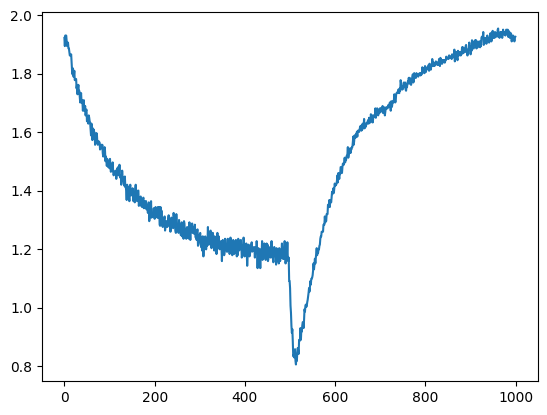

In [4]:
total_env = np.concatenate([top_env, -1*bottom_env+dif])
avg_env = np.mean(total_env.reshape(20,int(100000/window)),axis = 0)
avg_env_top = np.mean(top_env.reshape(10,int(100000/window)),axis = 0)
plt.plot(avg_env)


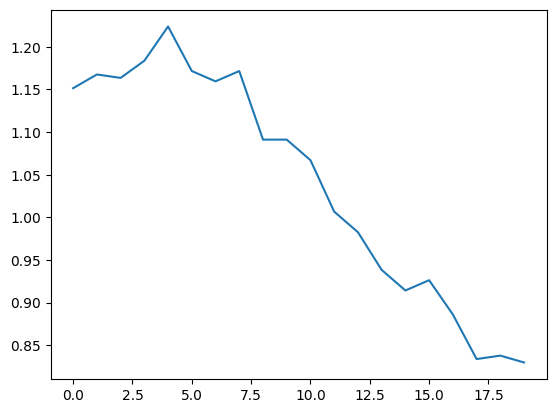

In [5]:
plt.plot(avg_env[490:510])

T1 Times:  60.0 60.0
R2:  0.018071140617401338
R2:  0.016412559693794626


C:\Users\ashco\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


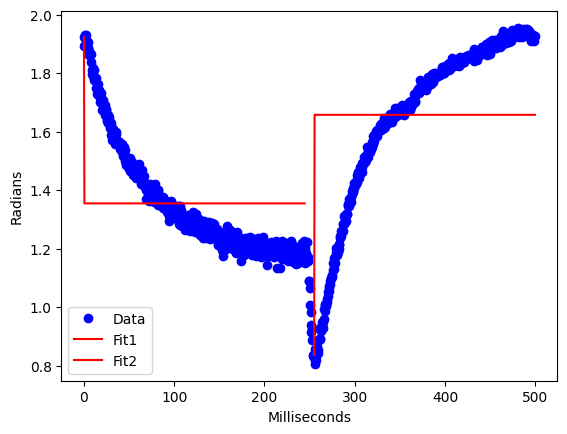

<Figure size 640x480 with 0 Axes>

In [6]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def exponential(x, a, b, c):
    return a * np.exp(1/b * x) + c


x = np.arange(0,245,0.5)
y1 = avg_env[0:490]
y2 = avg_env[510:]

popt1, pcov = curve_fit(exponential, x, y1, p0 = [0.9, -1/60, 1.1])
popt2, pcov = curve_fit(exponential, x, y2, p0 = [-1.2, -1/60, 2])
print("T1 Times: ", -1/popt1[1], -1/popt2[1])

# Plot the fitted function along with the data


y1_pred = exponential(x, *popt1)
print("R2: ", r2_score(y1, y1_pred))
y2_pred = exponential(x, *popt2)
print("R2: ", r2_score(y2, y2_pred))


plt.plot(np.arange(0,500,0.5), avg_env, 'bo', label='Data')
plt.plot(x, exponential(x, *popt1), 'r-', label='Fit1')
plt.plot(x+255, exponential(x, *popt2), 'r-', label='Fit2')
plt.legend()
plt.ylabel("Radians")
plt.xlabel("Milliseconds")
plt.show()
plt.savefig("Great T1 Data Plot #2")

T1 Times:  8.784243676125943 12.982477543193411
T1 STD:  -2.802252584460286 -1.411243433300033
R2:  0.9901973775174954
R2:  0.9969682492078279


Text(0, 0.5, 'Peak to Peak Voltage')

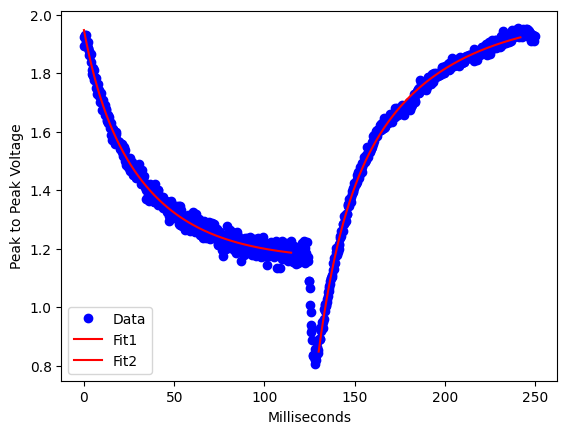

In [10]:
def exp_sum(x, a, b, c, d, e):
    return a * np.exp(1/b * x) + c * np.exp(1/d * x) + e

def exp_rise(x, a, b, c, e):
    return a * np.exp(1/b * x) + c * np.exp(1/-30 * x) + e

def exp_fall(x, a, b, c, e):
    return a * np.exp(1/b * x) + c * np.exp(1/-35 * x) + e

end3 = 115
end4 = 112
start4 = 520
x3 = np.arange(0,end3,0.25)
x4 = np.arange(0,end4,0.25)
y3 = avg_env[0:end3*4]
y4 = avg_env[start4:end4*4 + start4]

popt3, pcov1 = curve_fit(exp_sum, x3, y3, p0 = [-0.4, -5, -0.8, -30, 2])
popt4, pcov2 = curve_fit(exp_sum, x4, y4, p0 = [-0.4, -5, -0.8, -30, 2], bounds = ([-0.8,-20,-0.8,-50,1.8],[-0.4,0,-0.4,-10,2.2]))
print("T1 Times: ", -popt3[1], -popt4[1]) 
perr1 = np.sqrt(np.diag(pcov1))
perr2 = np.sqrt(np.diag(pcov2))


print("T1 STD: ", -perr1[1], -perr2[1])

from sklearn.metrics import r2_score

y1_pred = exp_sum(x3, *popt3)
print("R2: ", r2_score(y3, y1_pred))
y2_pred = exp_sum(x4, *popt4)
print("R2: ", r2_score(y4, y2_pred))


plt.plot(np.arange(0,250,0.25), avg_env, 'bo', label='Data')
plt.plot(x3, exp_sum(x3, *popt3), 'r-', label='Fit1')
plt.plot(x4+start4/4, exp_sum(x4, *popt4), 'r-', label='Fit2')
plt.legend()
plt.xlabel("Milliseconds")
plt.ylabel("Peak to Peak Voltage")